#**Funciones de Distribución de Probabilidad**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##**Distribución uniforme**
Los valores son equiprobables

In [ ]:
a = 1     # Límite inferior
b = 100   # Límite superior
n = 1000000   # Número de elemento o tamaño de la muestra
dist_uniforme = np.random.uniform(a, b, n)

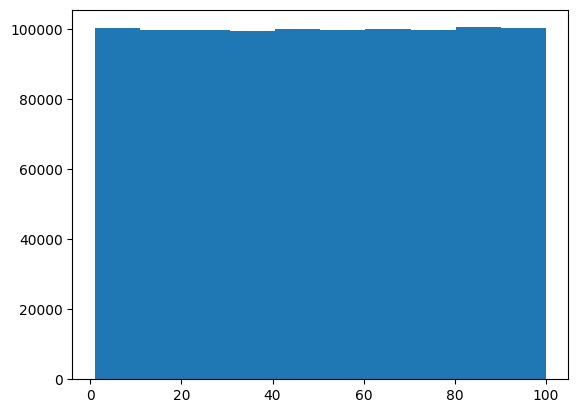

In [ ]:
plt.hist(dist_uniforme)
plt.show()

##**Distribución Normal**
Si es estandarizada tiene $\mu$ = 0 y $\sigma$ = 1.
* $\sigma$ = 68.26 %
* 2$\sigma$ = 95.44 %
* 3$\sigma$ = 99.72 %

In [ ]:
# Generadora de una distribución normal estándar
nn = 100000
dist_n = np.random.randn(nn)

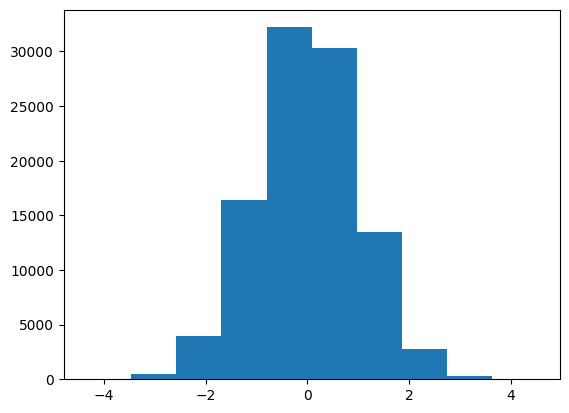

In [ ]:
plt.hist(dist_n)
plt.show()

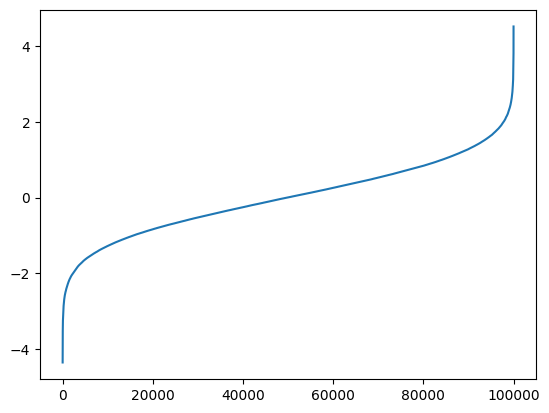

In [ ]:
x = range(1, nn + 1)
plt.plot(x, sorted(dist_n))
plt.show()

In [ ]:
# Generadora de una distribución normal con mu y sigma no estandarizada
mu = 7.8
sigma = 1.1
n = 10000
dist_normal = np.random.normal(mu, sigma, n)
# z = (X - mu) / sigma -> N(0, 1)
# z = np.random.randn(n)
# dist_normal = mu + sigma * np.random.randn(n) = mu + sigma * z

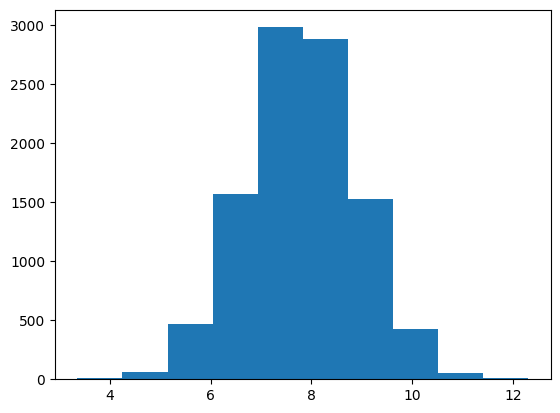

In [ ]:
plt.hist(dist_normal)
plt.show()

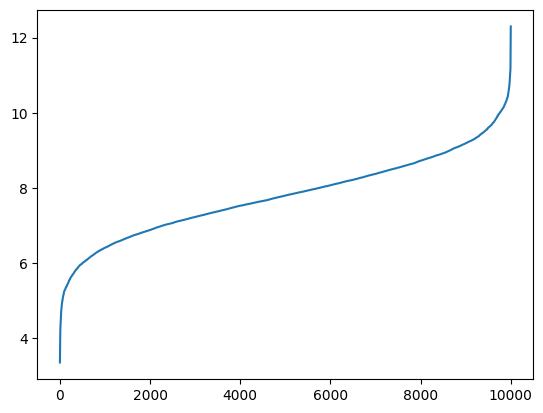

In [ ]:
x = range(1, n + 1)
plt.plot(x, sorted(dist_normal))
plt.show()

In [ ]:
# Sin parámetros genera un valor perteneciente a N(0, 1).
# Con un parámetro genera una muestra de ese tamaño de N(0, 1).
# Con dos parámetros el primero de ellos es el números de muestras (columnas) y el segundo el tamaño de cada (filas) una para N(0, 1).
dists = np.random.randn(2, 4)
dists

array([[-0.01634291, -1.51618131, -0.03804832,  1.43151676],
       [ 0.16916494, -0.86834145, -0.00866429, -1.17566289]])

##**La simulación de Monte Carlo para calcular $\pi$**
* Generar dos números aleatorios x e y entre 0 y 1.
* Calculamos $x^2$ + $y^2$:
  * Si el resultado es menor o igual a 1 $\Longrightarrow$ estamos dentro del círculo.
  * Si el resultado es mayor a 1 $\Longrightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y se divide entre el número de intentos para obtener una aproximación a la probabilidad de caer dentro del círculo.
* La probabilidad calculada de utiliza para aproximar el valor $\pi$.
* Se repite el experimento para obtener diferentes aproximaciones de $\pi$.
* Calculamos el promedio de los experimentos para obtener una aproximación final de $\pi$.

In [ ]:
def pi_monte_carlo(e, n):
  pi_avg = 0

  n_exp = e   #repeticiones del experimento
  n_int= n  #intentos por experimento

  pi_value_list = []
  for i in range(n_exp):
    value = 0
    for j in range(n_int):
      x = np.random.uniform(0, 1)
      y = np.random.uniform(0, 1)
      if x**2 + y**2 <= 1:
        value += 1
    pi_value = 4 * float(value) / n_int
    pi_value_list.append(pi_value)
    pi_avg += pi_value
  pi_avg /= n_exp
  return pi_value_list, pi_avg

In [ ]:
pi_list, pi = pi_monte_carlo(200, 10000)
print(pi)

3.1409179999999997


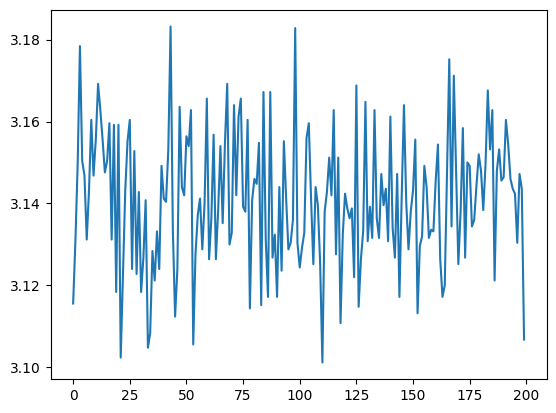

In [ ]:
plt.plot(pi_list)
plt.show()

## **Dummy Data Sets**

In [ ]:
n = 1000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [ ]:
data.describe()

,A,B,C
count,1000.000000,1000.000000,1000.000000
mean,0.002853,1.554337,18.707350
std,0.982270,2.480532,8.055892
min,-2.893299,-5.295394,5.004185
25%,-0.658835,-0.140983,11.429017
50%,0.007694,1.523210,18.779955
75%,0.649547,3.204465,25.660326
max,3.044208,8.790091,31.989954


(array([ 10.,  30.,  87., 170., 236., 220., 150.,  67.,  22.,   8.]),
 array([-2.89329876, -2.2995481 , -1.70579745, -1.11204679, -0.51829614,
         0.07545452,  0.66920517,  1.26295582,  1.85670648,  2.45045713,
         3.04420779]),
 <BarContainer object of 10 artists>)

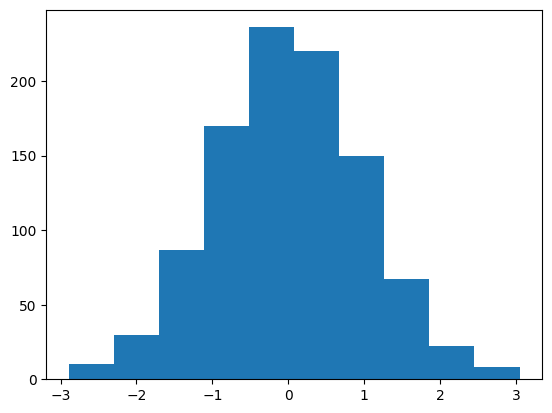

In [ ]:
plt.hist(data["A"])

(array([ 16.,  37.,  93., 165., 227., 206., 137.,  78.,  31.,  10.]),
 array([-5.29539427, -3.88684572, -2.47829718, -1.06974863,  0.33879992,
         1.74734846,  3.15589701,  4.56444555,  5.9729941 ,  7.38154264,
         8.79009119]),
 <BarContainer object of 10 artists>)

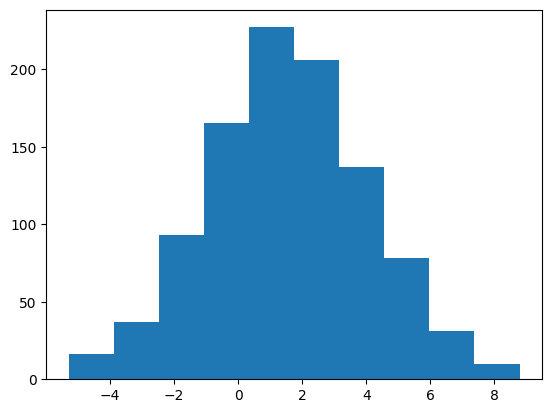

In [ ]:
plt.hist(data["B"])

(array([101., 115.,  89.,  91.,  94.,  87., 104.,  98.,  96., 125.]),
 array([ 5.00418487,  7.70276173, 10.4013386 , 13.09991546, 15.79849232,
        18.49706919, 21.19564605, 23.89422291, 26.59279978, 29.29137664,
        31.98995351]),
 <BarContainer object of 10 artists>)

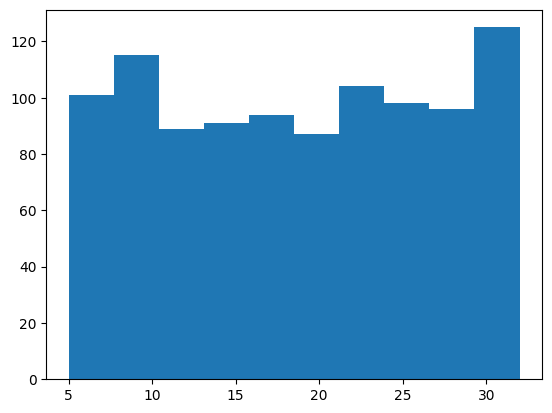

In [ ]:
plt.hist(data["C"])

In [ ]:
url = 'https://raw.githubusercontent.com/joanby/python-ml-course/refs/heads/master/datasets/customer-churn-model/Customer%20Churn%20Model.txt'
data1 = pd.read_csv(url)

In [ ]:
colum_names = data1.columns.values.tolist()
a = len(colum_names)

In [ ]:
data2 = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)

In [ ]:
data2.head(10)

,Column Name,A,B
42,State,0.609820,0.074780
43,Account Length,-1.469167,0.792351
44,Area Code,-0.095691,0.151145
45,Phone,-0.692590,0.170998
46,Int'l Plan,0.741166,0.060175
47,VMail Plan,-0.608668,0.960894
48,VMail Message,1.099519,0.052376
49,Day Mins,0.018286,0.575694
50,Day Calls,-0.921325,0.099954
51,Day Charge,-2.891686,0.933014
